# Template Matching

- template matching is the simplest form of object detection
- it simply scans a larger image for a provided tempalte by sliding the template target image across the larger image
- the methods are all some sort of correlation based metric

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


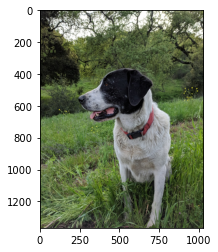

In [2]:
full = cv.imread("../DATA/sammy.jpg")
full = cv.cvtColor(full, cv.COLOR_BGR2RGB)
plt.imshow(full);

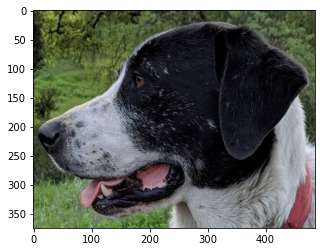

In [4]:
face = cv.imread("../DATA/sammy_face.jpg")
face = cv.cvtColor(face, cv.COLOR_BGR2RGB)
plt.imshow(face) ;


In [7]:
print(f"dimensions of full image : {full.shape} \n")

print(f"dimensions of face image : {face.shape}")



dimensions of full image : (1367, 1025, 3) 

dimensions of face image : (375, 486, 3)


***For template matching the image should be exact match***

## Eval function demonstration

In [8]:
# We can use the sum function by calling the name directly
sum([1,2,3])

6

In [9]:
# If we try to do this , this will not work
mystring = "sum"

mystring([1,2,3])

TypeError: 'str' object is not callable

In [10]:
# To make it work this can be done using the function eval, 
# which evaluates the string for corresponding function
my_function = eval(mystring)
my_function([1,2,3])

6

In [13]:
# All 6 methods for template matching

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

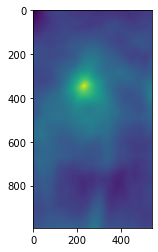

In [11]:
# Demo using one method [Template Matching Correlation Coefficient ]
my_method = eval('cv.TM_CCOEFF')
result_demo = cv.matchTemplate(full,face, my_method)
plt.imshow(result_demo) ;

Result is a heatmap, brigh part means a higher correlation and dark parts mean lower correlated values. Therefore brighest point in the heatmap signifies the match found.

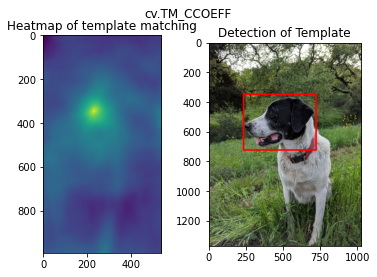

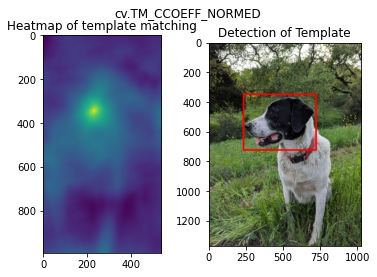

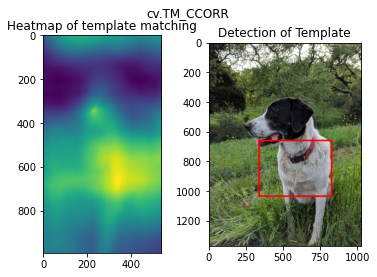

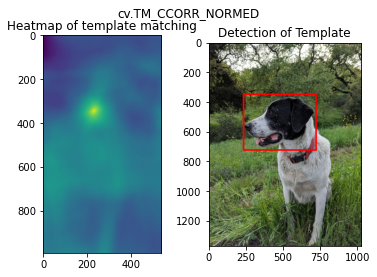

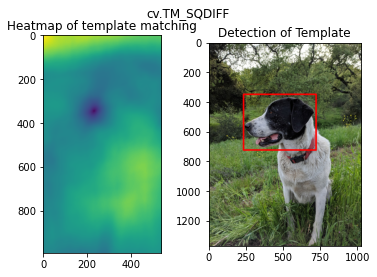

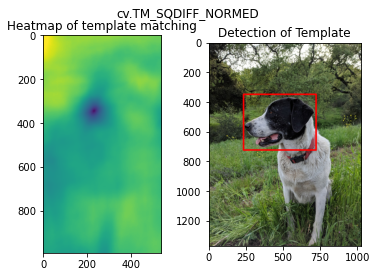

In [18]:
for m in methods:
    
    # Create a copy of image
    full_copy = full.copy()
    
    # Function
    method = eval(m)
    
    # Template matching
    result = cv.matchTemplate(full_copy, face, method) # (image for detection , image used for detection, method)
    
    min_val, max_val , min_loc, max_loc = cv.minMaxLoc(result)
    
    # Drawing rectangle for object detection
    
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc # (x,y)
    else:
        top_left = max_loc
        
    height, width, channels = face.shape
    
    bottom_right = (top_left[0] + width, top_left[1] + height)
    
    cv.rectangle(full_copy, top_left, bottom_right, (255,0,0),10)
    
    # Plot and Show images
    
    plt.subplot(121) 
    plt.imshow(result)
    plt.title("Heatmap of template matching")
    
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detection of Template')
    plt.suptitle(m) # Title with method used
    
    # to Avoid overwriting of plots
    plt.show()
    
    print('\n')
    print('\n')
    